#***TP 3 : Vision par ordinateur***

# Partie 1 : Concepts de base de la vision par ordinateur

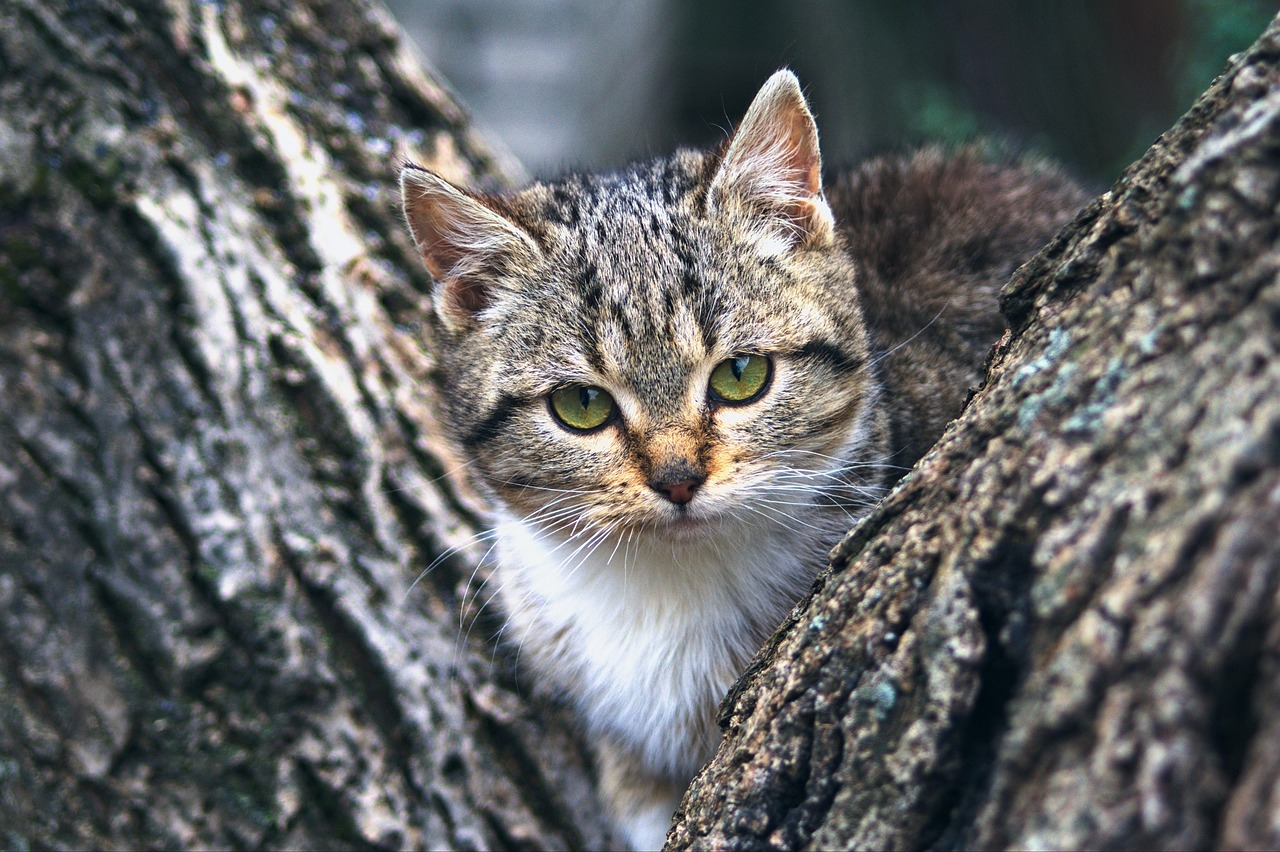

Image chargée avec succès


In [18]:
import cv2
from google.colab.patches import cv2_imshow

# 1. Lecture et affichage d’une image
img = cv2.imread("cat.jpg")
cv2_imshow(img)
print("Image chargée avec succès")

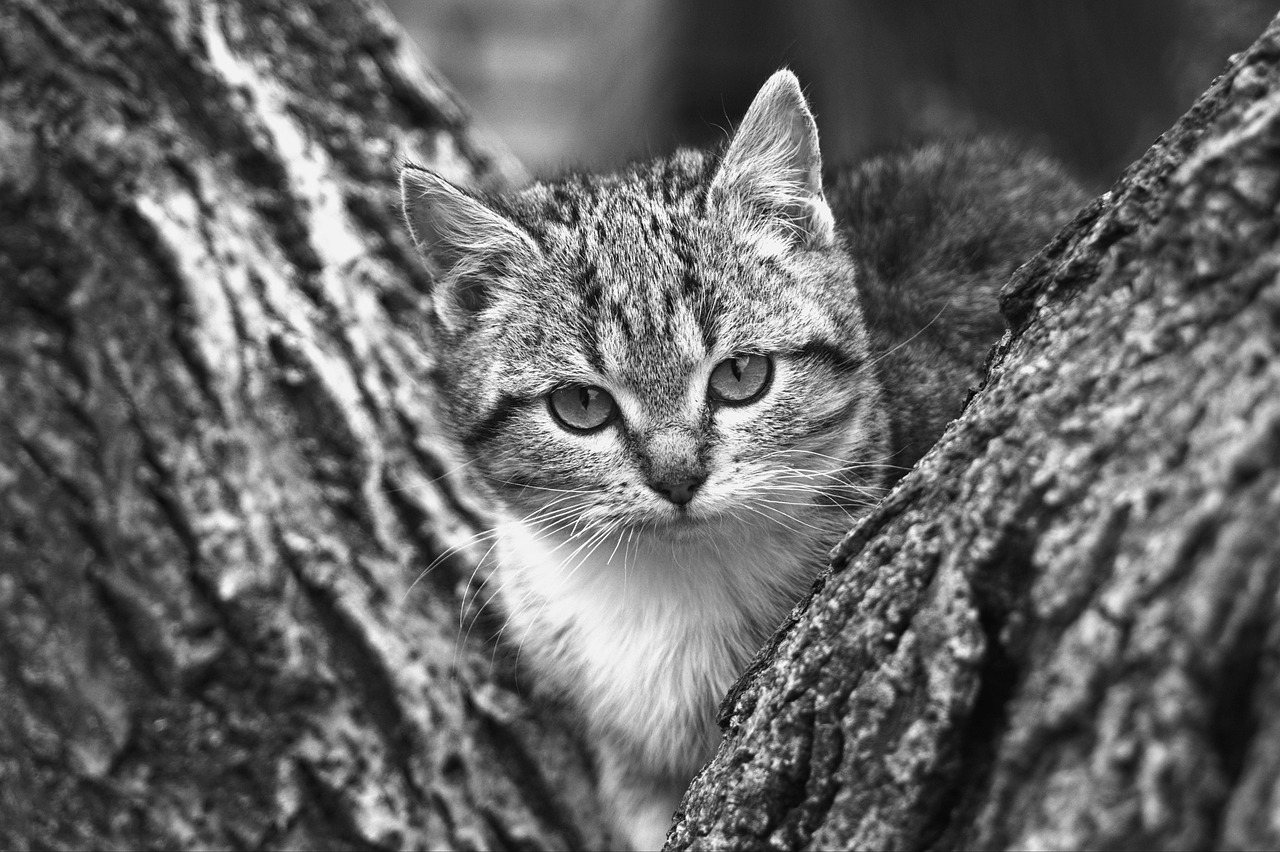

In [19]:
# 2. Conversion en niveaux de gris
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)

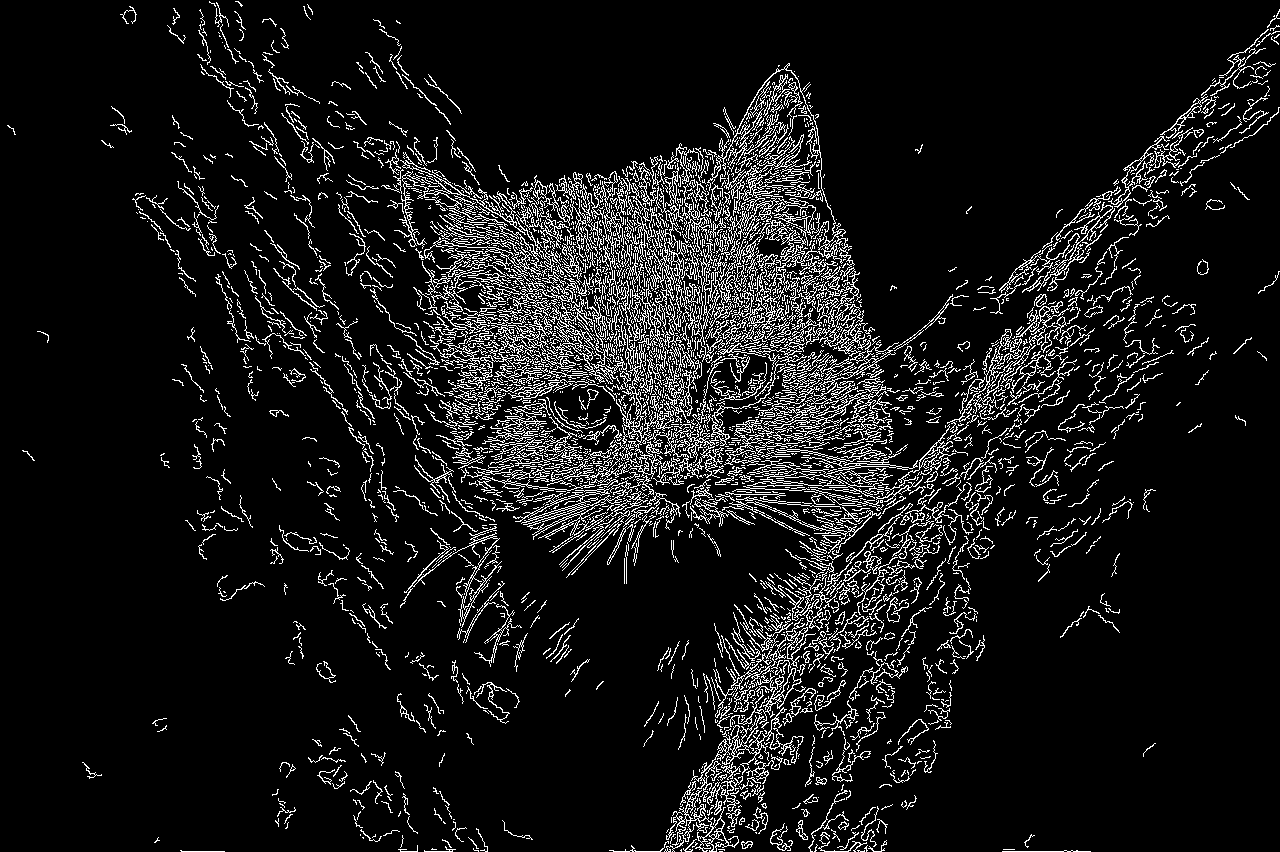

In [20]:
# 3. Détection des contours avec Canny
edges = cv2.Canny(gray, 100, 200)
cv2_imshow(edges)

**Questions :**
1. Que représente la matrice retournée par OpenCV pour l’image ?
La matrice retournée par OpenCV représente l'image sous forme numérique où chaque élément représente l’intensité d’un pixel.

2. Pourquoi convertit-on souvent l’image en niveaux de gris avant traitement ?
Pour simplifier les calculs, réduire la complexité et se concentrer sur la structure (formes, contours)


# Partie 2 : Traitement d’images et vidéos avec OpenCV

In [ ]:
cap = cv2.VideoCapture("cat.mp4")

while True:
    ret, frame = cap.read()
    if not ret:
        break

    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    cv2_imshow(gray_frame)

    if cv2.waitKey(30) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

**Question**

Que se passe-t-il si vous utilisez une vidéo enregistrée à la place de la webcam ?

OpenCV lit les images du fichier dans l’ordre, pas en temps réel. Et la lecture s’arrête automatiquement à la fin de la vidéo.

# Partie 3 : Détection et segmentation d’objets avec Detectron2

model_final_f10217.pkl: 178MB [00:01, 107MB/s]                           
/usr/local/lib/python3.12/dist-packages/torch/functional.py:554: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /pytorch/aten/src/ATen/native/TensorShape.cpp:4322.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


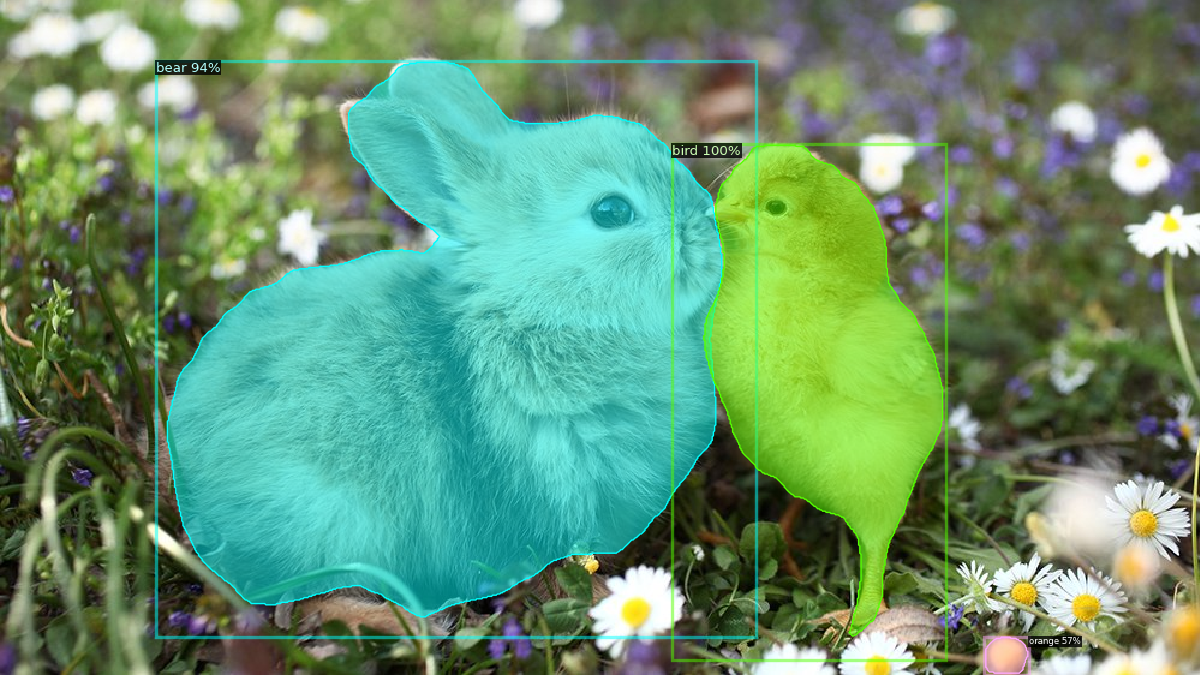

In [22]:
import cv2
import torch
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2 import model_zoo
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog
from google.colab.patches import cv2_imshow

# Configuration du modèle
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file(
    "COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url(
    "COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")

cfg.MODEL.DEVICE = "cpu"
predictor = DefaultPredictor(cfg)

img = cv2.imread("animals.jpg")
outputs = predictor(img)

# Visualisation
v = Visualizer(img[:, :, ::-1],
               MetadataCatalog.get(cfg.DATASETS.TRAIN[0]),
               scale=1.2)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(out.get_image()[:, :, ::-1])


**Questions** :
1. Quels objets ont été détectés ?
Le modèle a détecté les animaux présents dans l’image.
2. Modifiez le seuil SCORE_THRESH_TEST et observez l’effet sur la détection ?
Ce seuil définit la confiance minimale pour valider une détection. Un seuil plus bas détecte plus d’objets mais moins fiables, par contre un seuil plus haut filtre les détections incertaines.

# Partie 4 : Détection et reconnaissance faciale avec Dlib

##Exercice 4 : Détection faciale

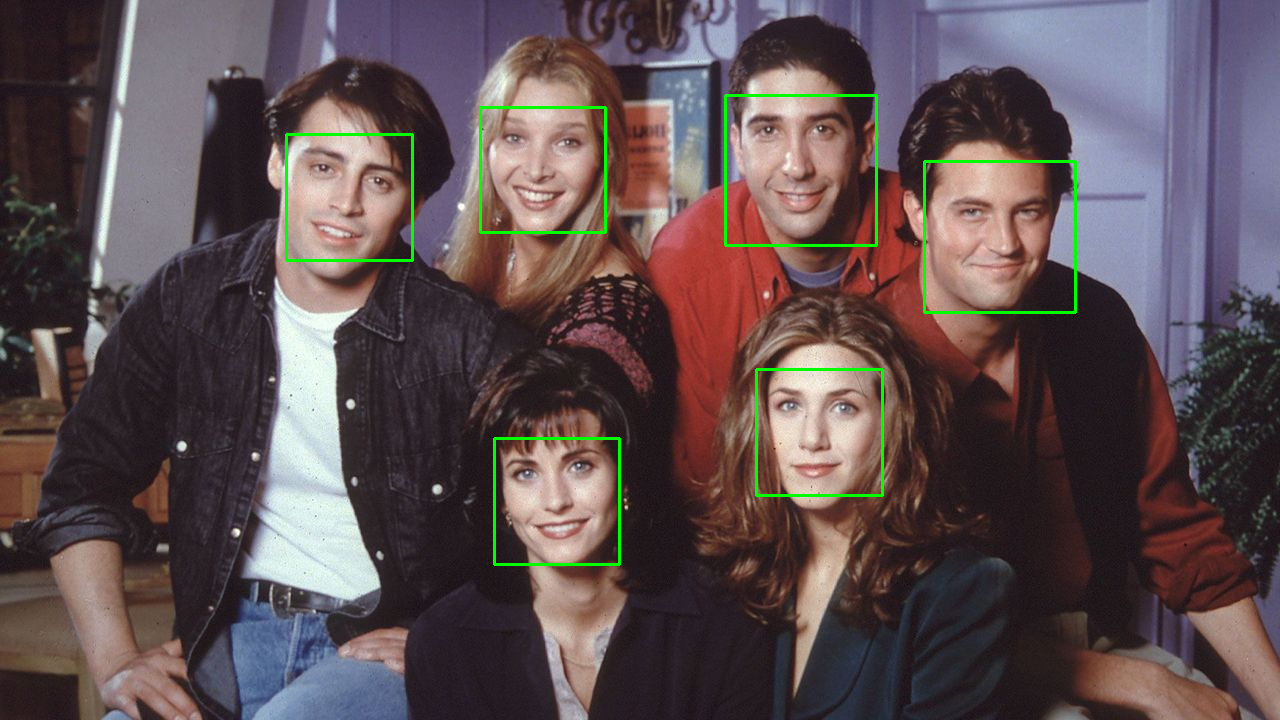

In [23]:
import dlib
import cv2
from google.colab.patches import cv2_imshow

detector = dlib.get_frontal_face_detector()
img = cv2.imread("friends.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

faces = detector(gray)
for face in faces:
    x, y, w, h = face.left(), face.top(), face.width(), face.height()
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)

cv2_imshow(img)

Dlib détecte tous les visages et trace un rectangle vert autour de chacun.

##Exercice 5 : Reconnaissance faciale

In [16]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

import face_recognition

image_ref = face_recognition.load_image_file("jennie_1.jpg")
encodage_ref = face_recognition.face_encodings(image_ref)[0]

image_test = face_recognition.load_image_file("jennie_2.jpg")
encodage_test = face_recognition.face_encodings(image_test)[0]

result = face_recognition.compare_faces([encodage_ref], encodage_test)
distance = face_recognition.face_distance([encodage_ref], encodage_test)

print("Même personne ?", result[0])
print(f"Distance faciale : {distance[0]:.4f}")

Même personne ? True
Distance faciale : 0.2927


**Questions :**
1. Que se passe-t-il si l’image test contient plusieurs visages ?
Il faut extraire tous les encodages et les comparer un par un avec l’encodage de référence.
2. Quelle précision attendez-vous de ce système dans des conditions réelles (lumière, angles
différents) ?
La précision dépend de la lumière, de l’angle et de la qualité de l’image. En conditions optimales elle est élevée (>90%) mais peut chuter en cas de variations.